# Tasks
## 1) Churn file with its function
## 2) Cleaning up city
## 3) Clean na/nans/missing data

In [48]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from src.dean_funcs import clean_dataframe

from scipy.special import comb
from scipy.stats import binom

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.inspection import permutation_importance

In [18]:
churn = clean_dataframe(pd.read_csv('data/churn.csv'))

In [19]:
churn

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell,Android,iPhone,Churn?,signup_date
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,0,1,0,0,1,False,2014-01-25
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,1,0,0,1,0,True,2014-01-29
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1,0,0,0,1,True,2014-01-06
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,0,1,0,0,1,False,2014-01-10
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,1,1,0,True,2014-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,2.53,4.7,4.8,1.11,11.1,3,True,55.6,1,0,0,0,1,False,2014-01-03
49994,2.25,4.5,4.6,1.44,37.5,1,False,25.0,1,0,0,0,1,True,2014-01-03
49995,5.63,4.2,5.0,1.00,0.0,0,False,100.0,0,1,0,0,1,False,2014-01-25
49997,3.86,5.0,5.0,1.00,0.0,0,True,100.0,0,0,1,1,0,True,2014-01-31


In [20]:
y = churn.pop('Churn?')

In [28]:
churn.pop('signup_date')

0       2014-01-25
1       2014-01-29
2       2014-01-06
3       2014-01-10
4       2014-01-27
           ...    
49993   2014-01-03
49994   2014-01-03
49995   2014-01-25
49997   2014-01-31
49998   2014-01-14
Name: signup_date, Length: 41744, dtype: datetime64[ns]

In [29]:
churn

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell,Android,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,2.53,4.7,4.8,1.11,11.1,3,True,55.6,1,0,0,0,1
49994,2.25,4.5,4.6,1.44,37.5,1,False,25.0,1,0,0,0,1
49995,5.63,4.2,5.0,1.00,0.0,0,False,100.0,0,1,0,0,1
49997,3.86,5.0,5.0,1.00,0.0,0,True,100.0,0,0,1,1,0


In [23]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 10)

In [24]:
model

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [30]:
model.fit(churn.values, y.values)

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [32]:
model

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [34]:
model.predict_proba(churn.values)

array([[0.94084625, 0.05915375],
       [0.06141122, 0.93858878],
       [0.10141607, 0.89858393],
       ...,
       [0.68225646, 0.31774354],
       [0.1216019 , 0.8783981 ],
       [0.13937855, 0.86062145]])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(churn.values, y.values)

In [44]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [49]:
y_predict = model.predict(X_test)

In [73]:
y_predict

array([ True,  True, False, ...,  True,  True,  True])

In [53]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).flatten()

In [54]:
tn, fp, fn, tp

(2904, 1346, 891, 5295)

In [55]:
f1 = (2 * tp) / ((2 * tp) + fp + fn)

In [56]:
f1

0.8256022452638965

In [ ]:
# how much money does a customer churning cost
# lifetime value of non-churning customer
# look at same month of churn cust vs non churn, look at avg dollar of churning
# how much does it cost to prevent churning/how much do you lose when someone churns

In [35]:
model.feature_importances_

array([0.05372597, 0.18443566, 0.03884644, 0.09321228, 0.13537091,
       0.04667177, 0.067937  , 0.10549975, 0.03415056, 0.11602809,
       0.02018879, 0.05643737, 0.04749543])

In [37]:
for column, value in zip(churn.columns, model.feature_importances_):
    print(column, value)

avg_dist 0.05372596749760188
avg_rating_by_driver 0.18443566151325333
avg_rating_of_driver 0.038846441829894135
avg_surge 0.09321227520275109
surge_pct 0.1353709091616162
trips_in_first_30_days 0.046671765153166234
luxury_car_user 0.06793699796957194
weekday_pct 0.10549974973944208
Astapor 0.034150557856663565
King's Landing 0.11602808695215114
Winterfell 0.020188790815545723
Android 0.056437367617002174
iPhone 0.047495428691340595


In [59]:
r = permutation_importance(model, churn.values, y.values, n_repeats=2, random_state=0)

In [58]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{churn.columns[i]:<8}"
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")

avg_rating_by_driver0.041 +/- 0.000
King's Landing0.040 +/- 0.001
weekday_pct0.027 +/- 0.001
luxury_car_user0.025 +/- 0.001
surge_pct0.018 +/- 0.001
Android 0.016 +/- 0.001
trips_in_first_30_days0.015 +/- 0.000
avg_dist0.013 +/- 0.001
avg_rating_of_driver0.011 +/- 0.000
Astapor 0.010 +/- 0.001
avg_surge0.010 +/- 0.001
iPhone  0.008 +/- 0.000
Winterfell0.003 +/- 0.000


In [128]:
churn

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell,Android,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,2.53,4.7,4.8,1.11,11.1,3,True,55.6,1,0,0,0,1
49994,2.25,4.5,4.6,1.44,37.5,1,False,25.0,1,0,0,0,1
49995,5.63,4.2,5.0,1.00,0.0,0,False,100.0,0,1,0,0,1
49997,3.86,5.0,5.0,1.00,0.0,0,True,100.0,0,0,1,1,0


In [90]:
train_churn = clean_dataframe(pd.read_csv('data/churn_train.csv'))

In [91]:
train_churn.pop('signup_date')

0       2014-01-12
1       2014-01-25
6       2014-01-18
7       2014-01-11
8       2014-01-01
           ...    
39995   2014-01-26
39996   2014-01-08
39997   2014-01-04
39998   2014-01-08
39999   2014-01-18
Name: signup_date, Length: 33367, dtype: datetime64[ns]

In [93]:
train_model = RandomForestClassifier(n_estimators = 1000, max_depth = 10)

In [94]:
train_y = train_churn.pop('Churn?')

In [95]:
train_model.fit(train_churn.values, train_y.values)

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [96]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_churn.values, train_y.values)

In [97]:
train_model.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [98]:
train_y_predict = train_model.predict(X_test2)

In [99]:
train_model.feature_importances_

array([0.06806131, 0.18254816, 0.04436252, 0.0903396 , 0.12785793,
       0.04964242, 0.06529292, 0.10723922, 0.03529241, 0.1105312 ,
       0.02085754, 0.04921455, 0.0487602 ])

In [100]:
for column, value in zip(train_churn.columns, train_model.feature_importances_):
    print(column, value)

avg_dist 0.06806131089625422
avg_rating_by_driver 0.18254815861991688
avg_rating_of_driver 0.04436251743872556
avg_surge 0.09033960292519112
surge_pct 0.12785793427551068
trips_in_first_30_days 0.049642423159033056
luxury_car_user 0.06529291770339489
weekday_pct 0.10723922457478434
Astapor 0.03529241312668675
King's Landing 0.11053120368435136
Winterfell 0.020857539535715022
Android 0.04921455262133794
iPhone 0.04876020143909832


In [101]:
train_r = permutation_importance(model, train_churn.values, train_y.values, n_repeats=2, random_state=0)

In [103]:
for i in train_r.importances_mean.argsort()[::-1]:
    if train_r.importances_mean[i] - 2 * train_r.importances_std[i] > 0:
        print(f"{train_churn.columns[i]:<8}"
            f"{train_r.importances_mean[i]:.3f}"
            f" +/- {train_r.importances_std[i]:.3f}")

avg_rating_by_driver0.042 +/- 0.000
King's Landing0.038 +/- 0.001
weekday_pct0.027 +/- 0.001
luxury_car_user0.025 +/- 0.001
surge_pct0.018 +/- 0.001
Android 0.016 +/- 0.001
trips_in_first_30_days0.014 +/- 0.000
avg_dist0.013 +/- 0.000
avg_surge0.011 +/- 0.002
Astapor 0.010 +/- 0.000
avg_rating_of_driver0.010 +/- 0.000
iPhone  0.008 +/- 0.000
Winterfell0.003 +/- 0.000


In [122]:
y_predict2 = train_model.predict(X_test2)

In [123]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test2, train_y_predict).flatten()

In [124]:
f1_test = (2 * tp2) / ((2 * tp2) + fp2 + fn2)

In [125]:
f1_test

0.8232200253238531

In [119]:
cf_values = np.array([[tp2, fp2], [fn2, tn2]])

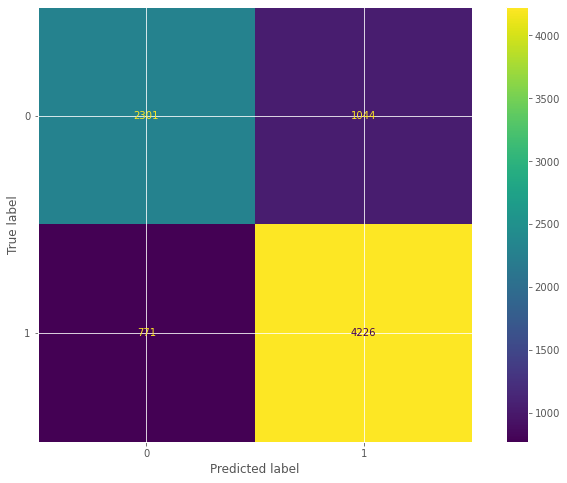

In [132]:
cm = confusion_matrix(y_test2, train_y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();